In [ ]:
#Installs all the necessary libraries from pip. %%Capture is used to collect cell outputs so they are not displayed.

In [1]:
%%capture 
pip install tensorflow

In [2]:
%%capture 
pip install --upgrade scikit-learn --user

In [3]:
%%capture 
pip install numpy

In [4]:
%%capture 
pip install seaborn

In [88]:
%%capture 

# Imports all required libraries and dataset from csv file

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import ipywidgets as widgets

# Import dataset from local directory
complete_data = pd.read_csv("curling_dataset.csv")


<AxesSubplot:xlabel='SET_NUMBER', ylabel='WEIGHT'>

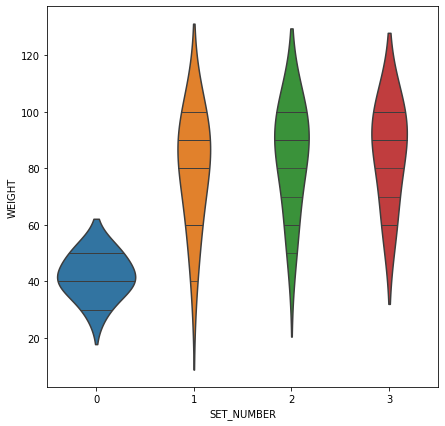

In [90]:
# Creates violin plot from the dataset 

plot_size =(7,7)
fig, ax = plt.subplots(figsize=plot_size)
sns.violinplot(x='SET_NUMBER', y='WEIGHT', data = complete_data, inner="stick", bw=.9)

In [99]:
# Seperates data into indepentent and depentent variables 

target_colunm = complete_data['WEIGHT']
predictors = complete_data[['REPEPTITIONS' , 'BODY_WEIGHT' , 'SET_NUMBER' , 'WORKOUT_ID']]

# Tester of normalizing the data set

#target_colunm = target_colunm/target_colunm.max()
#predictors = predictors/predictors.max()
#print(predictors)

In [100]:
# Divides data into training and testing values at a 70:30 split

X = predictors.values
Y = target_colunm.values 

# Random_state is used to generate the consistent test spilt to match documentation  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 40)

# prints out the distribution of testing data 

#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

In [101]:
%%capture 

# Builds and trains the model. Hide %%Capture to see individual iterations 

# Defines the settings for the neural network. Lower max_iter to reduce hardware usage. 
model = MLPClassifier(hidden_layer_sizes = (8,8,8), activation = 'identity', solver = 'adam', max_iter = 10000, verbose = 1, random_state = 1, learning_rate_init = 0.0001)

# Trains the model with dataset
model.fit(X_train, Y_train)

# Collects data for the classification and confusion matrix
predict_train = model.predict(X_train)
predict_test = model.predict(X_test) 


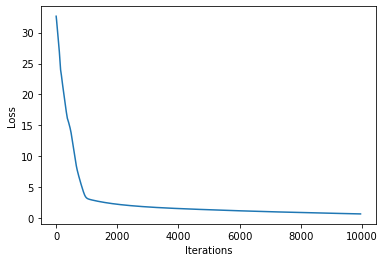

In [102]:
# Visualization of the model training. The loss value is a score on predictions, the higher the value the worse the prediction is. 

plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()

In [64]:
print(classification_report(Y_train, predict_train))

              precision    recall  f1-score   support

          30       1.00      1.00      1.00         1
          40       0.83      0.71      0.77         7
          50       0.57      0.67      0.62         6
          60       1.00      1.00      1.00         3
          70       1.00      1.00      1.00         2
          80       0.75      0.60      0.67         5
          90       0.64      0.78      0.70         9
         100       0.88      0.78      0.82         9

    accuracy                           0.76        42
   macro avg       0.83      0.82      0.82        42
weighted avg       0.78      0.76      0.76        42



C:\Users\DarkTemplar\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


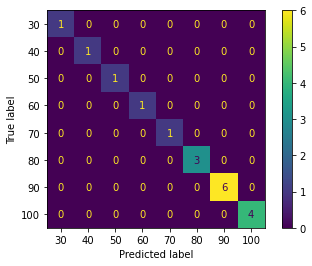

In [69]:
metrics.plot_confusion_matrix(model, X_test, predict_test)

In [120]:
# Function used to turn slider widgets into usable values to feed into the model and returns the prediction. Defines repetitions, body weight, workout id, and set number 

def get_weight():   
    
    
    # Handles the difficulty slider by creating a list of repeptitions to be completed.    
    difficulty_str =  difficulty_slider.value
    difficulty_input = [0,0,0,0]

    if difficulty_str == 'Easy':
        difficulty_input = [10,10,10,10]
    elif difficulty_str == 'Medium':
        difficulty_input = [10,8,8,8]
    elif difficulty_str == 'Hard':
        difficulty_input = [10,6,6,6]
    elif difficulty_str == 'Impossible':
        difficulty_input = [10,4,4,4]

    # Handles the weight slider
    weight_str =  weight_slider.value
    body_weight = predictors['BODY_WEIGHT']

    if weight_str == 'Lowest':
        body_input = min(body_weight)
    elif weight_str == 'Average':
        body_input = sum(body_weight) / len(body_weight)
    elif weight_str == 'Highest':
        body_input = max(body_weight)

    # sets workout id to highest value + 1 to simulate the users next workout
    workout_id = predictors['WORKOUT_ID'].max() + 1

    # combines the 3 values above into single list with increasing set numbers 0-3
    model_input = [[]]
    for i in range(4):
        model_input[0].append([difficulty_input[i], body_input, i, workout_id])


    # sends user request into model for prediction
    model_output =  model.predict(model_input[0])    

    # returns formatted output of the model
    output = 'Warm up: ' + str(model_output[0]) + 'lb ㅤㅤSet 1: ' + str(model_output[1]) + 'lbㅤㅤ Set 2: ' + str(model_output[2]) + 'lb ㅤㅤㅤ Set 3: ' + str(model_output[3]) + 'lb'
    return output

In [119]:
# Creates the user interface and sends values to get_weight function when button pressed

# Defines difficulty widget
difficulty_slider = widgets.SelectionSlider(
    options=['Easy', 'Medium', 'Hard', 'Impossible'],
    value='Medium',
    description='Difficulty',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True
)
# Defines weight widget
weight_slider = widgets.SelectionSlider(
    options=['Lowest', 'Average', 'Highest'],
    value='Average',
    description='User Weight',
    disabled=False,
    continuous_update=True,

    orientation='horizontal',
    readout=True
)

# Defines button widget
button = widgets.Button(
description='Run',
disabled=False,
button_style='', 
tooltip='Click me',
icon='check',
command = get_weight
)

# Creates temporary text that is transformed into model output
temp_display = widgets.Label(value='Waiting' )

# Creates single entity out of the 4 widgets 
vb=widgets.VBox([difficulty_slider,weight_slider,button,temp_display])

# Call get_weight function when button is pressed and changes the temporary text into the models output 
def on_click_get_weight(b):
    temp_display.value =  get_weight()
    

# Handles button action
button.on_click(on_click_get_weight)

# Displays widget box
display(vb)